**Load the Data**

In [32]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/datasets/Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


**Exploratory Data Analysis**

In [33]:
df.shape

(10, 3)

In [34]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [35]:
df.dtypes

,0
Position,object
Level,int64
Salary,int64


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


**Separate feature(x) & target(y)**

In [37]:
x=df["Level"]
y=df["Salary"]

In [38]:
print(x)


0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64


In [39]:
print(y)

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


**Identifying missing values**

In [40]:
df.isna().sum()

,0
Position,0
Level,0
Salary,0


**Splitting training and testing data**

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Polynomial Feature Transformation**

In [42]:
from sklearn.preprocessing import PolynomialFeatures
degree=2
poly=PolynomialFeatures(degree=degree)
x_train_poly=poly.fit_transform(x_train.values.reshape(-1, 1))
x_test_poly=poly.fit_transform(x_test.values.reshape(-1, 1))

**Feature Scaling(very important for Polynomial Regression**

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled_train=scaler.fit_transform(x_train_poly)
x_scaled_test=scaler.fit_transform(x_test_poly)

**Model fitting**

In [44]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_scaled_train,y_train)

LinearRegression()

**Making Prediction**

In [47]:
y_pred=model.predict(x_scaled_test)
print(y_pred)

[500528.00839115 -14278.00839115]


**Model Evaluation**

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("mae:",mae)
print("mse:",mse)

mae: 32403.008391149284
mse: 2065970577.796891


The polynomial linear regression model achieved an MAE of approximately 32,403, indicating that predictions differ from actual salaries by about 32k on average. Although the MSE is large due to squared errors and high salary values, the overall performance shows that the model effectively captures the non-linear salary trend

**Visualization**

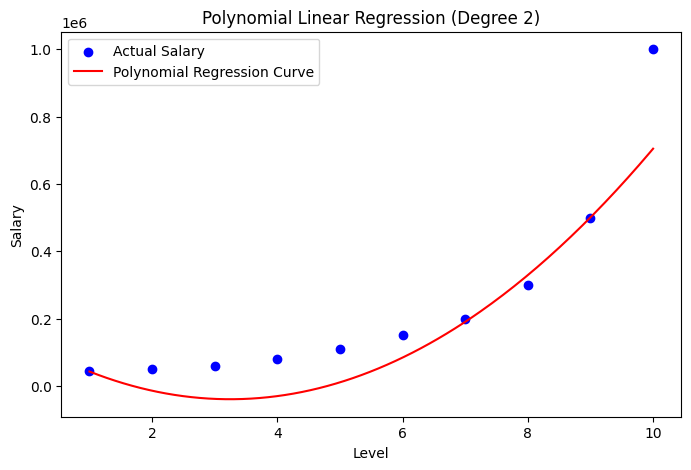

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Create smooth X values for curve
X_grid = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)

# Polynomial transformation
X_grid_poly = poly.transform(X_grid)

# Scaling
X_grid_scaled = scaler.transform(X_grid_poly)

# Prediction
y_grid_pred = model.predict(X_grid_scaled)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="Actual Salary", color="blue")
plt.plot(X_grid, y_grid_pred, label="Polynomial Regression Curve", color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title(f"Polynomial Linear Regression (Degree {degree})")
plt.legend()
plt.show()


This plot visualizes the non-linear relationship between position level and salary using a polynomial regression curve fitted on scaled polynomial features.